# Feature Selection

## Authors: Kyle Sung, James Cheng, Saffron Magoon, Lucas Merla

In [1]:
from src.utils import load_dataframe
from src.constants import DATA_DIR

df = load_dataframe(DATA_DIR / "data_cleaned_PersonalProperty.csv")
df.head()

Data loaded successfully.


,student_id,name,class,study,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout
0,1,"Saiz, Leslie",3,Humanities,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0
1,2,"Reddy, Dawna",3,Science,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0
2,3,"Rivera, Johnna",3,Business,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0
3,4,"al-Jamil, Umaira",4,Business,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0
4,5,"el-Mohammed, Qutb",2,Business,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0


In [2]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=["study"], prefix="", prefix_sep="")
df_encoded[["Business", "Humanities", "Other", "Science"]] = df_encoded[
    ["Business", "Humanities", "Other", "Science"]
].apply(lambda x: x.map({True: 1, False: 0}))
df_encoded.head()

,student_id,name,class,gpa,is_greek,is_on_campus,distance_to_campus,is_female,is_sprinklered,claim_id,amount,risk_tier,holdout,Business,Humanities,Other,Science
0,1,"Saiz, Leslie",3,1.203913,0,0,0.000000,0.0,1,0,0.0,2,0,0,1,0,0
1,2,"Reddy, Dawna",3,0.609616,0,0,0.000000,1.0,1,0,0.0,2,0,0,0,0,1
2,3,"Rivera, Johnna",3,3.073385,0,1,0.223942,1.0,0,0,0.0,2,0,1,0,0,0
3,4,"al-Jamil, Umaira",4,3.224736,0,0,0.000000,0.0,0,0,0.0,3,0,1,0,0,0
4,5,"el-Mohammed, Qutb",2,2.687851,0,0,0.000000,1.0,0,0,0.0,1,0,1,0,0,0


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
df_cleaned = df_encoded.drop(columns=['name', 'student_id', 'amount', 'holdout']).dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

pca = PCA(n_components=len(df_cleaned.columns))
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_

explained_variance_df = pd.DataFrame({'Feature': df_cleaned.columns, 'Explained Variance': explained_variance})
explained_variance_df = explained_variance_df.sort_values(by='Explained Variance', ascending=False)

explained_variance_df.sort_values(by='Explained Variance', ascending=False)

,Feature,Explained Variance
0,class,0.149804
1,gpa,0.126855
2,is_greek,0.103233
3,is_on_campus,0.102707
4,distance_to_campus,0.102137
5,is_female,0.085156
6,is_sprinklered,0.078516
7,claim_id,0.076141
8,risk_tier,0.075482
9,Business,0.068159


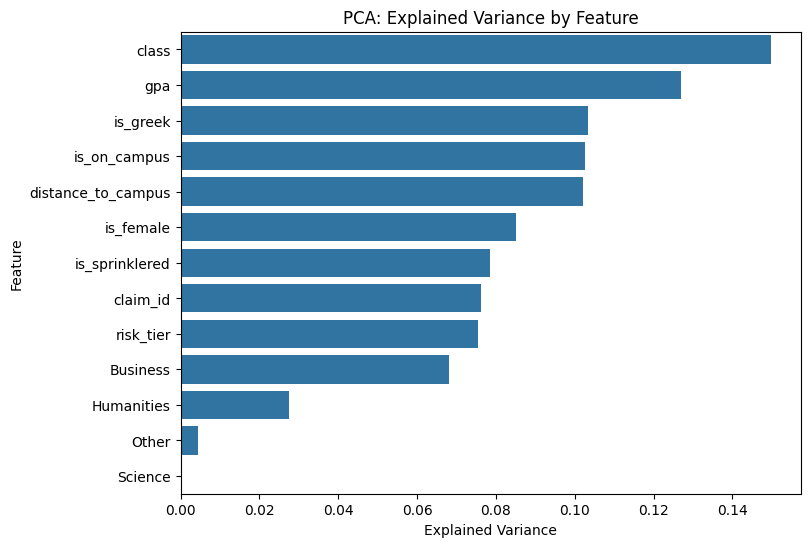

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.constants import IMG_DIR

plt.figure(figsize=(8, 6))
sns.barplot(x='Explained Variance', y='Feature', data=explained_variance_df)
plt.title('PCA: Explained Variance by Feature')
plt.savefig(IMG_DIR / "PCA_explained_variance_by_feature.png", bbox_inches = "tight")
plt.show()